# Ungraded Lab: Building a Custom Dense Layer

In this lab, we'll walk through how to create a custom layer that inherits the [Layer](https://keras.io/api/layers/base_layer/#layer-class) class. Unlike simple Lambda layers you did previously, the custom layer here will contain weights that can be updated during training.

This is also a nice and advanced example on how a linear model can be implmented with a simple NN

## Imports

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

# inherit from this base class
from tensorflow.keras.layers import Layer

## Custom Layer with weights

To make custom layer that is trainable, we need to define a class that inherits the [Layer](https://keras.io/api/layers/base_layer/#layer-class) base class from Keras. The Python syntax is shown below in the class declaration.

This class requires three functions: `__init__()`, `build()` and `call()`. These ensure that our custom layer has a *state* and *computation* that can be accessed during training or inference.

In [8]:
class SimpleDense(Layer):

    def __init__(self, units=32):
        '''Initializes the instance attributes'''
        # super(SimpleDense, self).__init__()
        # easier
        super().__init__()
        self.units = units

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights
        w_init = tf.random_normal_initializer()
        
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)
        # non so a cosa serva esattamente questa... non cambia nulla...
        super().build(input_shape)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return tf.matmul(inputs, self.w) + self.b

Now we can use our custom layer like below:

In [9]:
# declare an instance of the class
my_dense = SimpleDense(units=1)

# define an input and feed into the layer
x = tf.ones((1, 1))
y = my_dense(x)

# parameters of the base Layer class like `variables` can be used

# con variables accedo allo stato interno
print(my_dense.variables)

[<tf.Variable 'simple_dense_3/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.06825075]], dtype=float32)>, <tf.Variable 'simple_dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


Let's then try using it in simple network:

In [10]:
# define the dataset

# the functional relationship should be y = 2*x -1
# a simple linear relationship. For that reason, no need for activation
# that is normally non linear.
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# use the Sequential API to build a model with our custom layer
my_layer = SimpleDense(units=1)
model = tf.keras.Sequential([my_layer])

# configure and train the model
model.compile(optimizer='sgd', loss='mean_squared_error')
history =model.fit(xs, ys, epochs=500,verbose=0)

# perform inference
print(model.predict([10.0]))

# see the updated state of the variables
print(my_layer.variables)

[[18.981382]]
[<tf.Variable 'simple_dense_4/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9973015]], dtype=float32)>, <tf.Variable 'simple_dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([-0.99163336], dtype=float32)>]


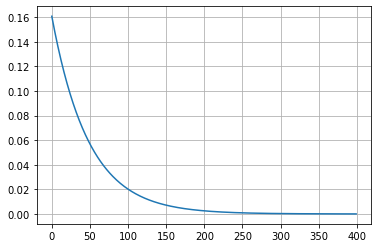

In [11]:
loss = history.history['loss']

plt.plot(loss[100:])
plt.grid(True)

In [7]:
print(my_layer.variables)

[<tf.Variable 'simple_dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9973189]], dtype=float32)>, <tf.Variable 'simple_dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.99168736], dtype=float32)>]
